# Setup

In this tutorial we use the defaul version of the CTGAN: 
https://github.com/sdv-dev/CTGAN

We also need to install table evaluator to evaluate the quality of the generated synthetic data.

In [1]:
pip install numpy --upgrade --ignore-installed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [2]:
!pip install ctgan


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now we download a dataset that includes both continuous and discrete values. I chose a random dataset from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [4]:
# !gdown 1CFLXcella3VFDzPJRGrfkGlYNOhf1RCQ

In [4]:
import pandas as pd
data = pd.read_csv('/content/radiosondeObv.csv')

In [5]:
data

,HGHT,TEMP,PRES,RELH,DRCT,SPED
0,1150,33.0,947.4,14,175,2.2
1,1163,31.7,946.0,16,320,1.9
2,1172,31.9,945.0,16,326,2.9
3,1179,32.0,944.3,16,327,3.4
4,1184,32.2,943.8,16,327,3.6
...,...,...,...,...,...,...
4801,18887,-84.9,75.1,24,73,4.7
4802,18892,-84.9,75.0,24,73,4.8
4803,18897,-85.0,74.9,24,74,4.8
4804,18901,-85.0,74.9,24,75,4.8


Next, we define a list with column names for categorical variables. This list will be passed to the model so that the model can decide how to process these fields.

In [6]:
categorical_features = ['HGHT','TEMP','PRES','RELH','DRCT','SPED']

#Model training

Next, we simply define an instance of CTGANSynthesizer and call the fit method with the dataframe and the list of categorical variables.

We train the model for 300 epochs only as the discriminator and generator loss becomes quite low after these many epochs.

In [7]:
# pip install numpy --upgrade --ignore-installed

In [8]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 50)

Epoch 1, Loss G:  6.3949,Loss D: -0.0171
Epoch 2, Loss G:  6.3961,Loss D: -0.0432
Epoch 3, Loss G:  6.4694,Loss D: -0.0618
Epoch 4, Loss G:  6.2083,Loss D: -0.0730
Epoch 5, Loss G:  6.3518,Loss D: -0.1050
Epoch 6, Loss G:  6.2096,Loss D: -0.0908
Epoch 7, Loss G:  6.3818,Loss D: -0.0586
Epoch 8, Loss G:  6.4191,Loss D: -0.0470
Epoch 9, Loss G:  6.3517,Loss D: -0.0271
Epoch 10, Loss G:  6.2740,Loss D: -0.0310
Epoch 11, Loss G:  6.1777,Loss D: -0.0026
Epoch 12, Loss G:  6.1119,Loss D: -0.0251
Epoch 13, Loss G:  6.0722,Loss D: -0.0061
Epoch 14, Loss G:  5.9594,Loss D: -0.0160
Epoch 15, Loss G:  5.9929,Loss D: -0.0177
Epoch 16, Loss G:  5.7156,Loss D: -0.0257
Epoch 17, Loss G:  5.7597,Loss D: -0.0282
Epoch 18, Loss G:  5.5809,Loss D: -0.0118
Epoch 19, Loss G:  5.5385,Loss D: -0.0164
Epoch 20, Loss G:  5.4939,Loss D: -0.0106
Epoch 21, Loss G:  5.0348,Loss D: -0.0279
Epoch 22, Loss G:  5.0862,Loss D: -0.0392
Epoch 23, Loss G:  5.0051,Loss D: -0.0439
Epoch 24, Loss G:  4.6349,Loss D: -0.0346
E

#Synthetic data generation

In [9]:
samples = ctgan.sample(1000)

In [10]:
samples

,HGHT,TEMP,PRES,RELH,DRCT,SPED
0,1988,-80.1,168.3,14,311,5.6
1,12276,6.5,541.9,3,31,2.2
2,5457,16.6,787.9,22,262,4.9
3,17182,-43.5,360.8,2,97,3.5
4,15027,0.9,329.2,23,91,2.2
...,...,...,...,...,...,...
995,6318,-48.5,611.9,24,76,10.2
996,8755,-55.8,408.2,5,98,11.5
997,16211,8.4,762.3,14,98,5.5
998,11627,-51.0,292.8,22,130,3.3


#Evaluation

In [10]:
ctgan.save("test.pkl")

In [11]:
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

data.columns

(4806, 6) (1000, 6)


Index(['HGHT', 'TEMP', 'PRES', 'RELH', 'DRCT', 'SPED'], dtype='object')

In [14]:
data

,HGHT,TEMP,PRES,RELH,DRCT,SPED
0,1150,33.0000,947.4000,14,175,2.2000
1,1163,31.7000,946.0000,16,320,1.9000
2,1172,31.9000,945.0000,16,326,2.9000
3,1179,32.0000,944.3000,16,327,3.4000
4,1184,32.2000,943.8000,16,327,3.6000
...,...,...,...,...,...,...
4801,18887,-84.9000,75.1000,24,73,4.7000
4802,18892,-84.9000,75.0000,24,73,4.8000
4803,18897,-85.0000,74.9000,24,74,4.8000
4804,18901,-85.0000,74.9000,24,75,4.8000


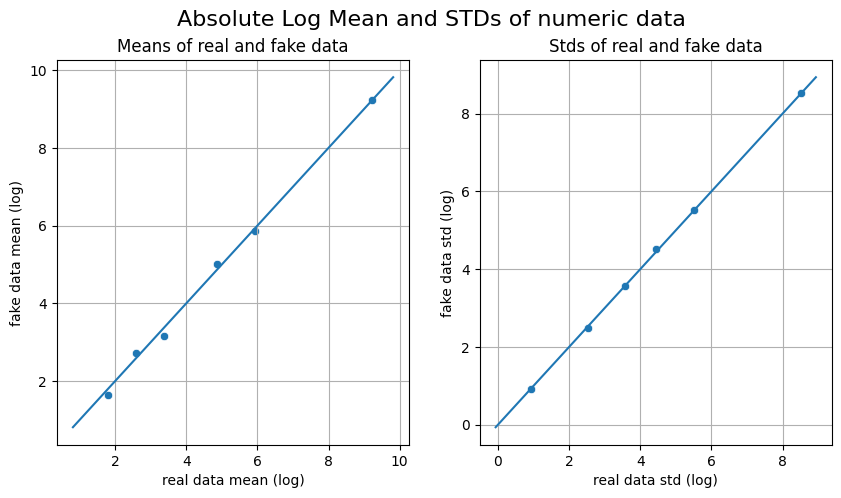

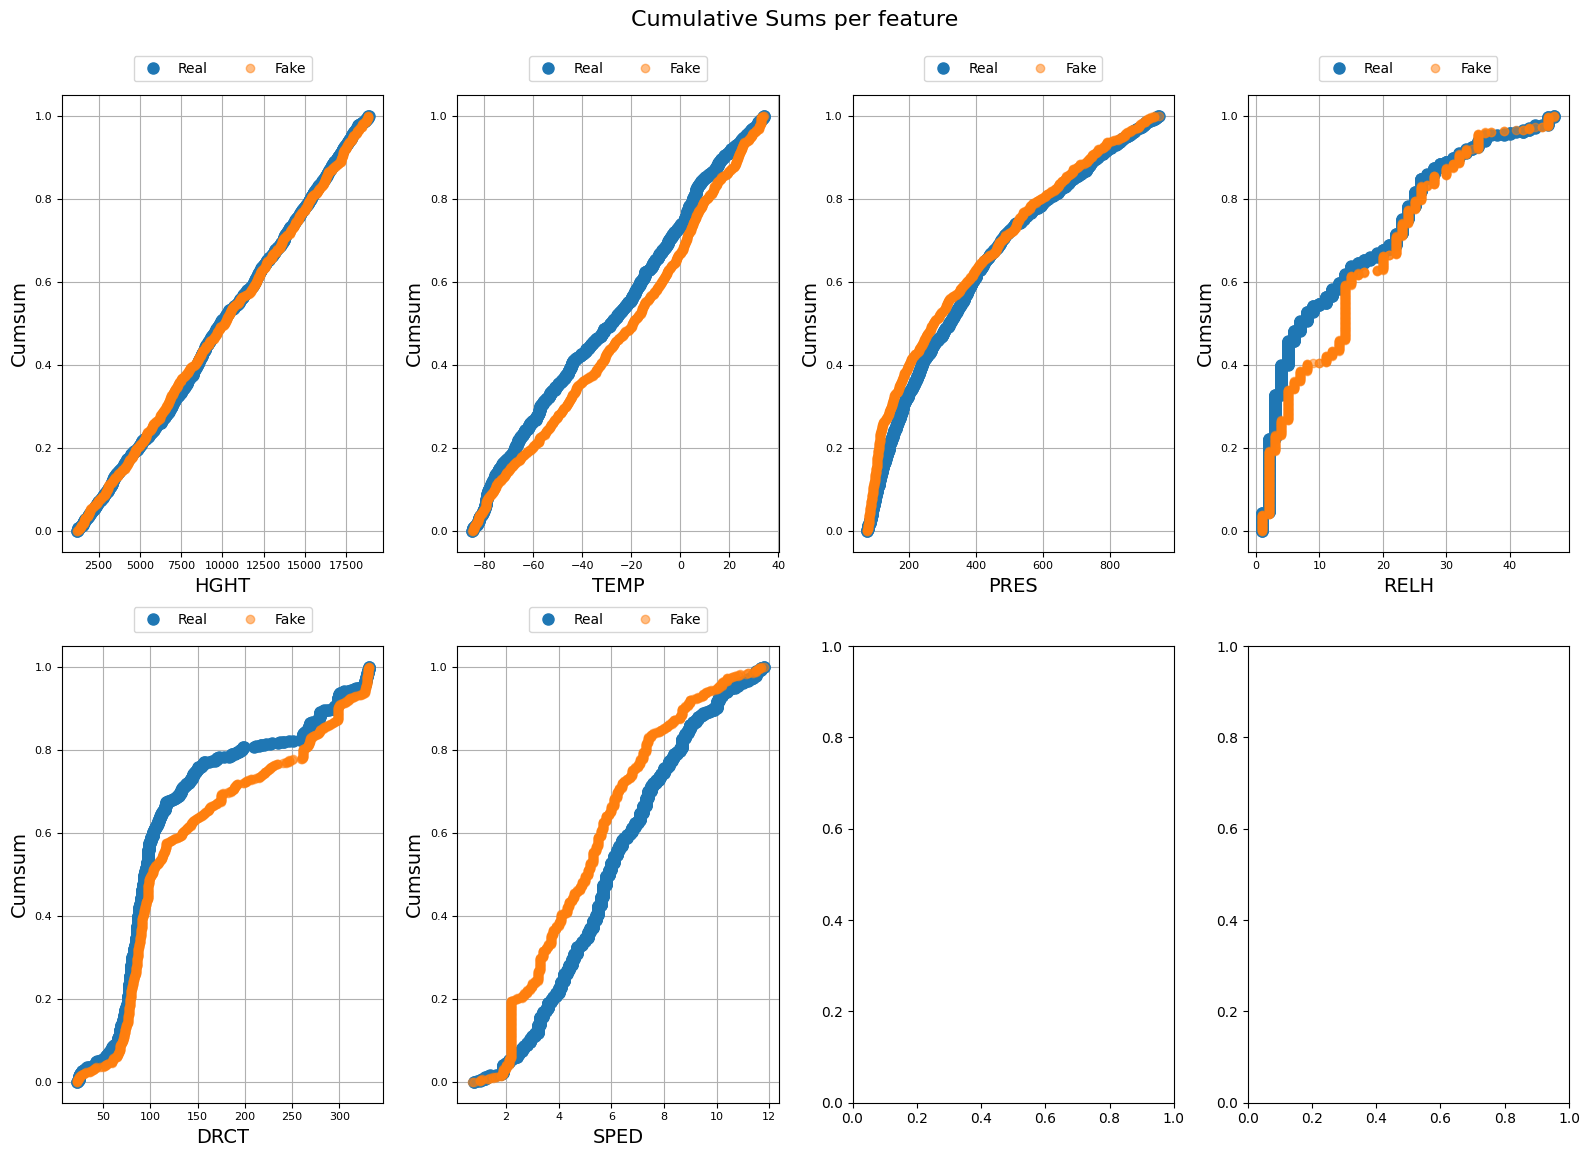

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * s

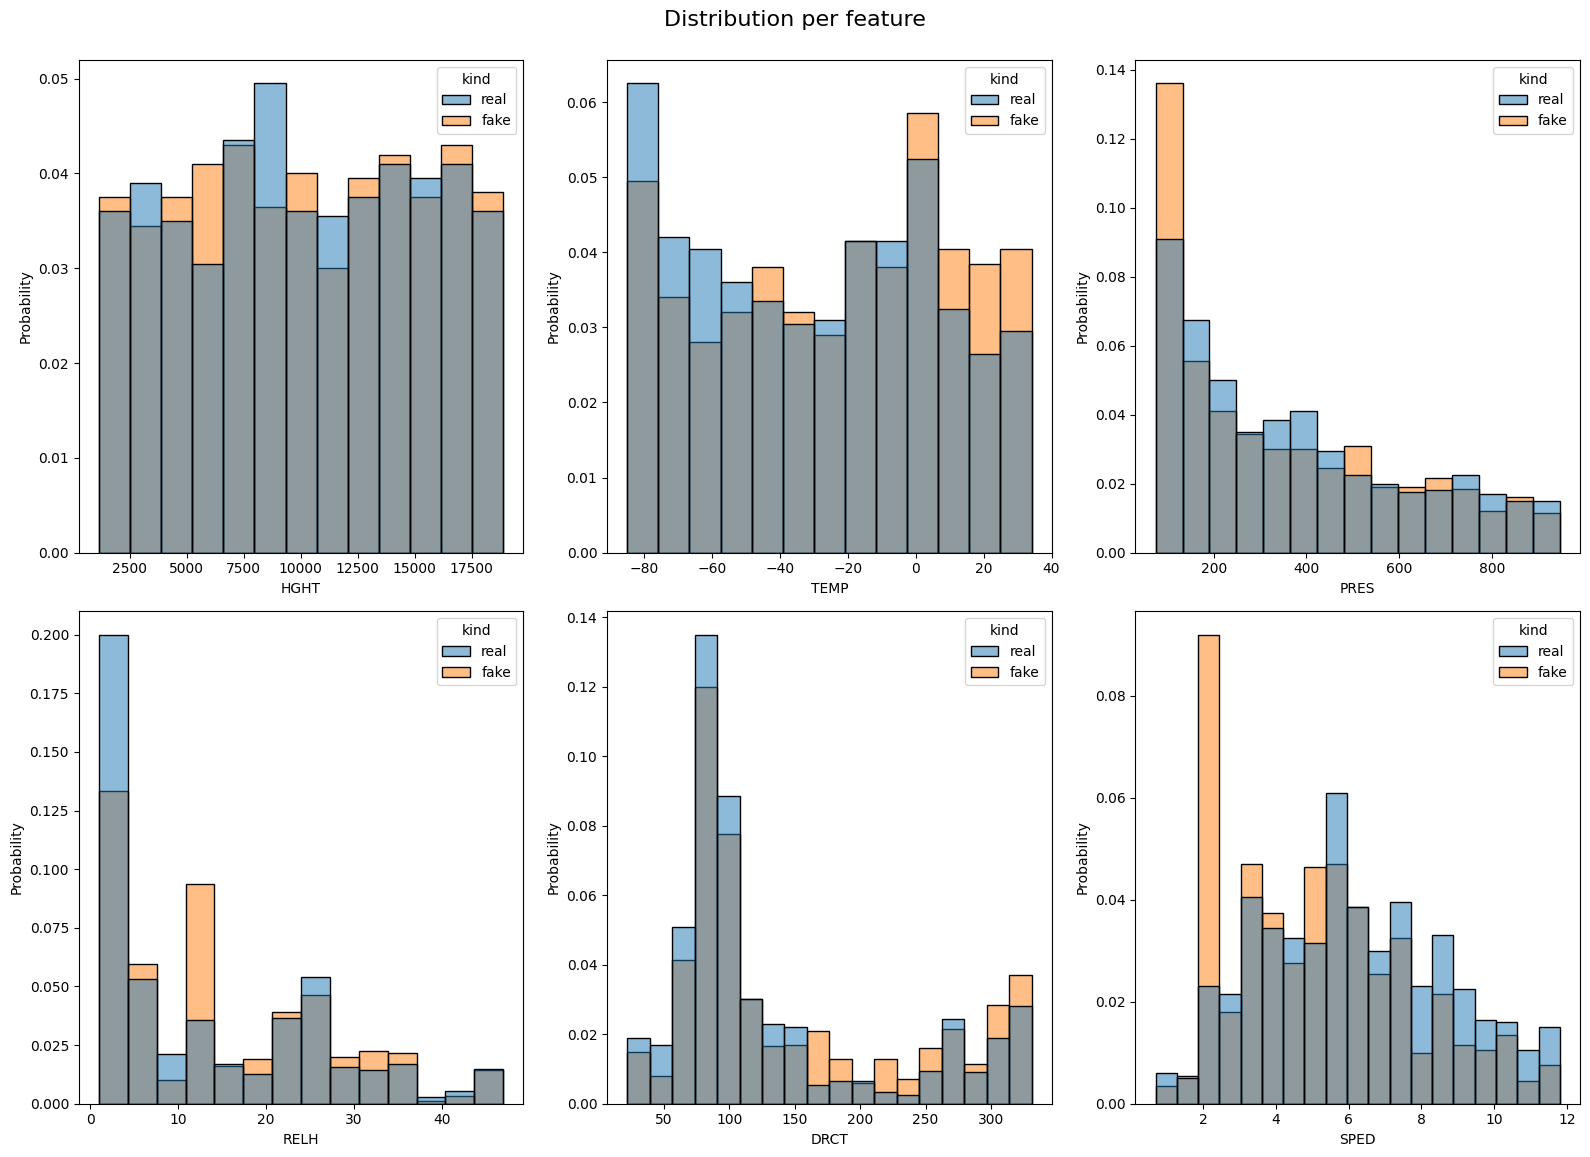

TypeError: ignored

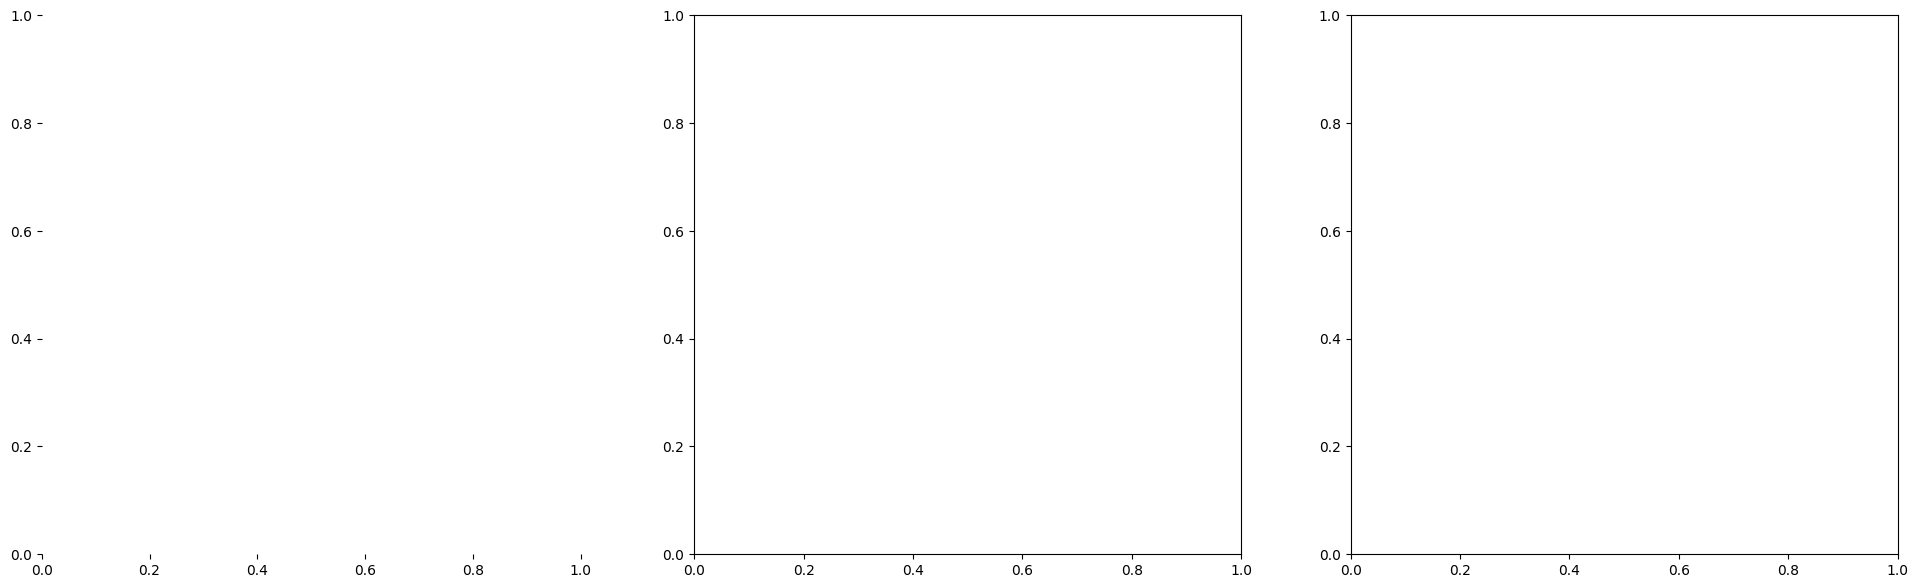

In [34]:
import matplotlib.pyplot as plt
table_evaluator =  TableEvaluator(data, samples)
plt.show()
table_evaluator.visual_evaluation()

In [35]:
table_evaluator =  TableEvaluator(data, samples)


In [43]:
table_evaluator.evaluate(target_col = categorical_features[3])


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.0900   0.0600              0.0363
DecisionTreeClassifier_real   0.8350   0.0350              0.0152
LogisticRegression_fake       0.0800   0.1500              0.1561
LogisticRegression_real       0.2650   0.1350              0.1429
MLPClassifier_fake            0.0700   0.0200              0.0336
MLPClassifier_real            0.1100   0.0100              0.0336
RandomForestClassifier_fake   0.0800   0.0900              0.0959
RandomForestClassifier_real   0.8300   0.0550              0.0256

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    0.7643
nearest neighbor std                     0.2554

Miscellaneous results:
                                  Result
Column Cor

/usr/local/lib/python3.10/dist-packages/table_evaluator/metrics.py:95: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  distances = Parallel(n_jobs=-1)(
/usr/local/lib/python3.10/dist-packages/table_evaluator/metrics.py:121: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  distances = Parallel(n_jobs=-1)(
